# DMML Portfolio (FIRE) - Group 3

## LAB2

## Setup

In [13]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required


In [14]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [15]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request


In [16]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Get the data

With this code, we download the dataset stored in our github package "DMLL-F21DL"

In [17]:
#FIRE_PATH = os.path.join("datasets", "fire")
#FIRE_URL = "/Users/yehiagomaa/Documents/MSc. Robotics/F21DL DMML/DMLL-F21DL-main/Dataset/fire_archive.csv"
#STORAGE_PATH = "/home/marc/notebook/datasets/fire/fire_archive.csv"
#def fetch_fire_data(fire_url=FIRE_URL, fire_path=FIRE_PATH, storage_path=STORAGE_PATH):
 #   os.makedirs(fire_path, exist_ok=True)
 #   urllib.request.urlretrieve(fire_url,storage_path)

In [18]:
#fetch_fire_data()
# calling the function fetch_fire_data, (defined above) creates a datasets/fire directory in our workspace, 
# downloads fire_archive.csv file to this directory 

`load_fire_data` function loads the `fire_archive.csv` into a panda `dataframe`

In [19]:
fire = pd.read_csv('fire_archive.csv')


In [20]:
#fire = load_fire_data() # "fire" now becomes a pandas DataFrame object containing all the data
fire.head() # Display the top five rows of the DataFrame
#Q1 How many attribuites in the data set? Desribe the attribuites .
#A1: There are totally 15 attributes in the dataset. The latitude and longitude attributes refer to the 
#    geographic location of the hotspots detected by the satellites. The brightness attribute is the pixel
#    measurement of the temperature in Kelvin. Scan and Track attributes refers to the pixel measurement of 
#    the scanned area. acq_date refers to the date of acquisition of data while acq_time refers to the time spent
#    during the acquisition of data. Satellite attribute refers to which satellite was used for acquiring the data 
#    while instrument refers to the instrument used by the satellites for measurmeent. Confidence refers to the
#    quality of the hostpot in the specified region of interest. This parameter can be used to predict whether an 
#    hostspot is a fired area or not. This will be our target feature (Values greater than 60% or 70% ususally
#    mean the hotspot is actually a firespot). Version attribute refers to the collection of source. bright_t31 
#    is the pixel measurement of temperature in the 3-1 Channel. frp attribute depicts the pixel-integrated 
#    fire radiative power in MW (Mega Watts). Daynight attribute refers to when the instance were obtained, whether
#    day or night. Finally the type attribute refers to the type of environment of the instance.

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,Terra,MODIS,48,6.3,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,Terra,MODIS,71,6.3,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,Terra,MODIS,42,6.3,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,Terra,MODIS,33,6.3,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,Terra,MODIS,36,6.3,298.8,27.6,D,0


In [21]:
#This method prints information about a DataFrame including the dtype and columns, non-null values and memory usage.
fire.info() 
#Q2 Can you tell if there are any missing values? If yes, which attribuites contain missing values ? 
#A2: There are no missing values in the dataset, fortunately. This will probably help us in accurately predicting 
#     the target feature.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36011 entries, 0 to 36010
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    36011 non-null  float64
 1   longitude   36011 non-null  float64
 2   brightness  36011 non-null  float64
 3   scan        36011 non-null  float64
 4   track       36011 non-null  float64
 5   acq_date    36011 non-null  object 
 6   acq_time    36011 non-null  int64  
 7   satellite   36011 non-null  object 
 8   instrument  36011 non-null  object 
 9   confidence  36011 non-null  int64  
 10  version     36011 non-null  float64
 11  bright_t31  36011 non-null  float64
 12  frp         36011 non-null  float64
 13  daynight    36011 non-null  object 
 14  type        36011 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 4.1+ MB


All attributes are numerical, except the acq_date, satellite, instrument and daynight. We need to explore the 
possibility of changing the data type of acq_date as it cannot be considered as a categorical data.

In [22]:
print(fire["daynight"].value_counts())
print(fire["instrument"].value_counts())
print(fire["satellite"].value_counts())
# Q3 What does the value_count() method display?
# A3: The value_count() displays the number of values in each category of an attribute across the dataset. Here
#     there are 28,203 values indicating that the respective measurements were taken during daytime while 7,808 
#     values indicating that those measurements were taken during night time. The satelliete dataset has two 
#     categories indicating the model of satellite that was used for measurmenet. It is observed that the 
#     instrument attribute has only one category  across the entire dataset, which clearly indicates that the 
#     attribute can dropped from the dataset when processing. 

D    28203
N     7808
Name: daynight, dtype: int64
MODIS    36011
Name: instrument, dtype: int64
Aqua     20541
Terra    15470
Name: satellite, dtype: int64


In [23]:
#This method shows a statistical summary of the numerical attributes 
fire.describe() 

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
count,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,3.601100e+04,36011.000000,36011.000000,36011.000000
mean,-19.100962,138.931446,328.750696,1.620905,1.215281,600.025798,67.551387,6.300000e+00,301.339138,51.132176,0.019439
std,7.265777,9.261400,18.992808,0.813764,0.247852,548.369111,23.179946,3.728625e-12,9.724462,92.280112,0.198326
min,-42.762800,114.104300,300.000000,1.000000,1.000000,0.000000,0.000000,6.300000e+00,267.000000,0.000000,0.000000
25%,-26.370250,131.072250,316.500000,1.100000,1.000000,205.000000,52.000000,6.300000e+00,293.600000,13.800000,0.000000
50%,-15.706500,136.738500,326.400000,1.300000,1.100000,424.000000,70.000000,6.300000e+00,302.400000,25.800000,0.000000
75%,-13.343600,147.477500,336.700000,1.900000,1.300000,600.000000,86.000000,6.300000e+00,308.600000,52.800000,0.000000
max,-10.072600,153.490400,504.400000,4.800000,2.000000,2359.000000,100.000000,6.300000e+00,400.100000,3679.500000,3.000000


The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations fall.

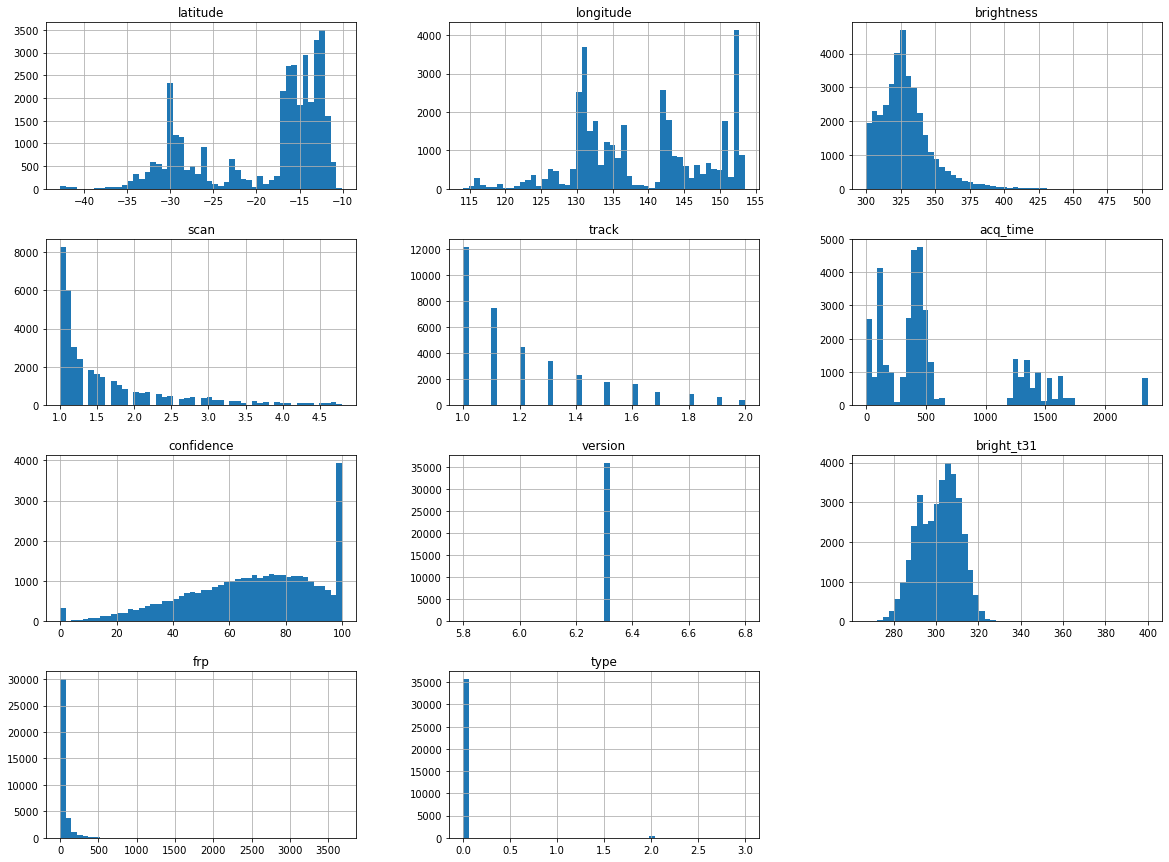

In [24]:
#To plot a histogram for each numerical attribute
fire.hist(bins=50, figsize=(20,15))
plt.show()
# Q4 List down the main observations you noted from the statistical summary and the histogram
# A4: The statistical summary and the histograms do not consider the categorical data or more precisely they do not
#     consider the object type of data. While the acq_date is not a categorical data, we have to consider the 
#     activity of changing the data type.


# Visualizing Geographical Data

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

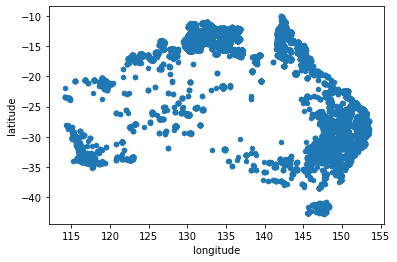

In [25]:
# Q5 Now you will plot 3 different variations of the data, which one is more indicative and why?
# A5: The first plot does not help us in finding any particular pattern. The second plot is comparitively better
#     in representing the density of areas where the measurement were taken. The third plot is more indicative
#     as we can understand the different confidence levels of hotspot across the areas.
fire.plot(kind="scatter", x="longitude", y="latitude")


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

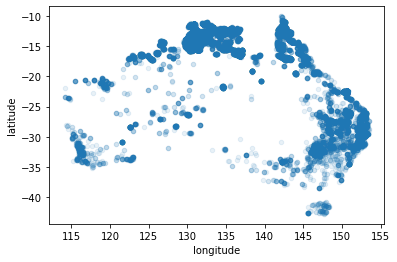

In [26]:
fire.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

The above plot helps us  to better understand the density of the areas where the measurements were taken 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


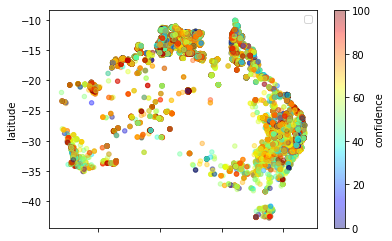

In [27]:
fire.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    #s=fire["brightness"]/100, label="brightness", figsize=(10,7),
    c="confidence", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()
# plots the confidence of the hotspots with red being high confidence and blue being low confidence. 


In [28]:
# Now we will look at the correlation of all the attributes with the expected class attribute (confidence)
corr_matrix = fire.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes

In [29]:
corr_matrix["confidence"].sort_values(ascending=False)
# Q6 Which are the most correlated attributes with the output variable(i.e.confidence)?
# Does that make sense?
# A6: The most correlated attributes with the target attribute confidence are the brightness and the frp such that
#     they have strong positive correlation. According to the definitions of these two attributes, it makes
#     sense that the brightness, which is the temperature of hotspot region, and the frp, which is the 
#     radiative power of the hotspot, can affect the confidence of the hotspot more than the other features. 
#     The scan, track and acq_time attributes have negative correlation with the confidence attribute. This may 
#     be due to the reason that the more amount of time the satellite spends on a particular region of interest,
#     the less likely it can be that that region has low confidence of hotspot

confidence    1.000000
brightness    0.614691
frp           0.355388
bright_t31    0.238506
latitude      0.020656
longitude    -0.035529
type         -0.041632
acq_time     -0.070012
scan         -0.103808
track        -0.105949
version            NaN
Name: confidence, dtype: float64

array([[<AxesSubplot:xlabel='confidence', ylabel='confidence'>,
        <AxesSubplot:xlabel='brightness', ylabel='confidence'>,
        <AxesSubplot:xlabel='frp', ylabel='confidence'>,
        <AxesSubplot:xlabel='bright_t31', ylabel='confidence'>],
       [<AxesSubplot:xlabel='confidence', ylabel='brightness'>,
        <AxesSubplot:xlabel='brightness', ylabel='brightness'>,
        <AxesSubplot:xlabel='frp', ylabel='brightness'>,
        <AxesSubplot:xlabel='bright_t31', ylabel='brightness'>],
       [<AxesSubplot:xlabel='confidence', ylabel='frp'>,
        <AxesSubplot:xlabel='brightness', ylabel='frp'>,
        <AxesSubplot:xlabel='frp', ylabel='frp'>,
        <AxesSubplot:xlabel='bright_t31', ylabel='frp'>],
       [<AxesSubplot:xlabel='confidence', ylabel='bright_t31'>,
        <AxesSubplot:xlabel='brightness', ylabel='bright_t31'>,
        <AxesSubplot:xlabel='frp', ylabel='bright_t31'>,
        <AxesSubplot:xlabel='bright_t31', ylabel='bright_t31'>]],
      dtype=object)

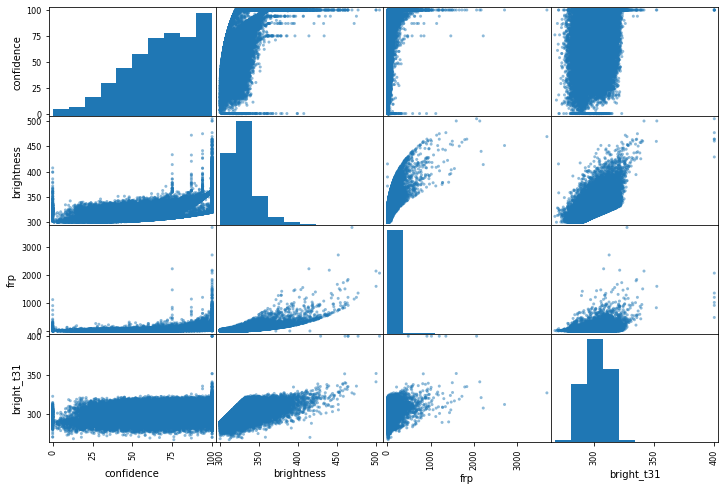

In [30]:
from pandas.plotting import scatter_matrix

attributes = ["confidence", "brightness", "frp",
              "bright_t31"]
scatter_matrix(fire[attributes], figsize=(12, 8))
# Another way to check for correlation between attributes is to use the pandas scatter_matrix() function above
# Here we choose to plot 4 promising  numerical attributes against each other


(300.0, 500.0, 0.0, 100.0)

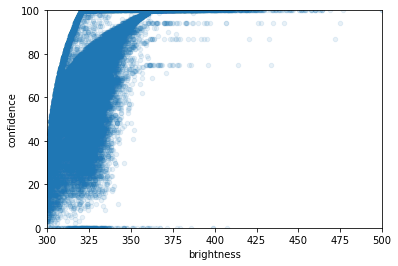

In [31]:
# let’s zoom in on the correlation scatterplot "confidence & the brightness,"
fire.plot(kind="scatter", x="brightness", y="confidence",
             alpha=0.1)
plt.axis([300, 500, 0, 100])
#Q7 Describe the plot below. What does this indicate? Do you have an explanation for the solid line?
#A7:  Due to the upward trend, it can be concluded that the correlation is very strong. There are straight  
#     horizontal lines at around 100, 90, 85, 75 and even around 0. This needs to be considered in order to prevent
#     data quirks

# Dealing with Null Values

Since this dataset does not have null values, we are inserting null values to some records to demonstrate the Data Cleaning Process

In [32]:
sample_incomplete_rows = fire[fire.isnull().any(axis=1)].head()
sample_incomplete_rows

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type


In [33]:
sample_incomplete_rows.dropna(subset=["acq_time"])

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type


In [34]:
sample_incomplete_rows.drop("acq_time", axis=1) 

,latitude,longitude,brightness,scan,track,acq_date,satellite,instrument,confidence,version,bright_t31,frp,daynight,type


In [35]:
median = fire["acq_time"].median() # calculate the median of total_bedrooms
fire["acq_time"].fillna(median, inplace=True)

In [36]:
fire.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,Terra,MODIS,48,6.3,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,Terra,MODIS,71,6.3,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,Terra,MODIS,42,6.3,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,Terra,MODIS,33,6.3,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,Terra,MODIS,36,6.3,298.8,27.6,D,0


## Scikit-Learn solution (optional)


In [37]:
from sklearn.impute import SimpleImputer      # Look up SimpleImputer Class in Sklearn Documenation
imputer = SimpleImputer(strategy="median")    # Replace each missing attribute with median of that attribute 

In [38]:
#We cant compute the median of a categorical data, therefore we are creating a copy of the data without cat. data
fire_num = fire.drop(["acq_date","satellite", "instrument", "version", "daynight"] ,axis=1) 

In [39]:
imputer.fit(fire_num)

SimpleImputer(strategy='median')

The imputer has simply computed the median of each attribute and stored the result in its `statistics_` instance variable. 

In [40]:
imputer.statistics_

array([-15.7065, 136.7385, 326.4   ,   1.3   ,   1.1   , 424.    ,
        70.    , 302.4   ,  25.8   ,   0.    ])

In [41]:
fire_num.median().values #Check that this is the same as manually computing the median of each attribute


array([-15.7065, 136.7385, 326.4   ,   1.3   ,   1.1   , 424.    ,
        70.    , 302.4   ,  25.8   ,   0.    ])

In [42]:
X = imputer.transform(fire_num) # transform the data set

In [43]:
fire_tr = pd.DataFrame(X, columns=fire_num.columns,
                          index=fire_num.index) # load the new tranformed data set into the pandas frame fire_tr

### Handling Text and Categorical Attributes

In [44]:
fire_cat = fire[["daynight", "satellite"]]
fire_cat.head(10)  # look at the values for the first 10 instances 

,daynight,satellite
0,D,Terra
1,D,Terra
2,D,Terra
3,D,Terra
4,D,Terra
5,D,Terra
6,D,Terra
7,D,Terra
8,D,Terra
9,D,Terra


In [45]:
fire_cat.tail(10)
# look at the values for the last 10 instances

,daynight,satellite
36001,N,Aqua
36002,N,Aqua
36003,N,Aqua
36004,N,Aqua
36005,N,Aqua
36006,N,Aqua
36007,N,Aqua
36008,N,Aqua
36009,N,Aqua
36010,N,Aqua


In [46]:
from sklearn.preprocessing import OrdinalEncoder
# sklearn OrdinalEncoder class is used to convert categorical values to numbers
ordinal_encoder = OrdinalEncoder() 
fire_cat_encoded = ordinal_encoder.fit_transform(fire_cat)
fire_cat_encoded[:10] # Lists the numerical values that correspond to the categorical attribute
# Q15 Why can representing a catogorical variable with numbers be a problem in ML?
# A15: There may be a possibility that nearby values are more similar than distant values.However as far as this
# dataset is considered the categorical values have only binary classification. 

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [47]:
# 1 D array of categories for the attribute 'ocean-proximity'
ordinal_encoder.categories_ # prints the categories for all categorical attributes , here we only have one categorical attribute


[array(['D', 'N'], dtype=object), array(['Aqua', 'Terra'], dtype=object)]

In [48]:
# An alternative way to represent a categorical attribuite is to use 'one-hot-encoding'

from sklearn.preprocessing import OneHotEncoder  
# OneHotEncoder class converts categorical values into one-hot vectors , this assumes no order so better for categorical variables

cat_encoder = OneHotEncoder()
fire_cat_1hot = cat_encoder.fit_transform(fire_cat)
fire_cat_1hot

<36011x4 sparse matrix of type '<class 'numpy.float64'>'
	with 72022 stored elements in Compressed Sparse Row format>

In [49]:
type(fire_cat_1hot) # This is a SciPy sparce matrix ( not a NumPy array)
# a sparse matrix only stores the location of the non‐zero enties , therefore saves memory

scipy.sparse.csr.csr_matrix

In [50]:
fire_cat_1hot.toarray() # To convert it to a (dense) NumPy array, call toarrray() method

array([[1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       ...,
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.]])

In [51]:
cat_encoder = OneHotEncoder(sparse=False) # Alternatively, you can set sparse=False when creating the OneHotEncoder
fire_cat_1hot = cat_encoder.fit_transform(fire_cat)
fire_cat_1hot

array([[1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       ...,
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.]])

In [52]:
cat_encoder.categories_         # Get a list of categories

[array(['D', 'N'], dtype=object), array(['Aqua', 'Terra'], dtype=object)]

### Feature Scaling (optional)




In week 2 lectures you have learned about two common ways to get all attributes to have the same scale: min-max scaling and standardization (Zscore).

Sklearn provides two transformer functions for this 

In [53]:
#Q16 Research sklearn documentation for the functions MinMaxScaler() and StandardScaler() and try to experiment with it on the housing data set
#A16: Normalisation or Standardisation need to be done on the dataset inorder to scale the values. For eg, 
#     brightness attribute has a min and max values of 300.000000 and 504.4 while frp attribute has a min and max 
#     values of 0 and 3679.5. To avoid the numerical values frm having such different scales, we perform
#     normalisation or standarisation

In [54]:
#Normalisation using MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler

temp_fire = fire.drop(["acq_date","daynight", "satellite", "instrument"] , axis=1)
#temp_fire.head()
minmax_scaler = MinMaxScaler() #Initialising the MinMaxScaler as a class
print(minmax_scaler.fit(temp_fire)) #Fitting the data 
print(minmax_scaler.data_max_) #Max value of each attribute

MinMaxScaler()
[-1.007260e+01  1.534904e+02  5.044000e+02  4.800000e+00  2.000000e+00
  2.359000e+03  1.000000e+02  6.300000e+00  4.001000e+02  3.679500e+03
  3.000000e+00]


In [55]:
#print(minmax_scaler.transform(temp_fire)) #Transform features by scaling each feature to a given range(0,1)
fire_norm = minmax_scaler.transform(temp_fire) #Normalised data of 11 numerical attributes
print(fire_norm)

[[0.94694434 0.70974278 0.06360078 ... 0.22764838 0.00179372 0.        ]
 [0.94739096 0.71042068 0.0944227  ... 0.22764838 0.00307107 0.        ]
 [0.91535078 0.47656661 0.05675147 ... 0.23816679 0.00627803 0.        ]
 ...
 [0.44260053 0.36581434 0.00831703 ... 0.17580766 0.00149477 0.        ]
 [0.44241699 0.36684769 0.01761252 ... 0.17505635 0.00154912 0.        ]
 [0.3639837  0.18776167 0.04452055 ... 0.17956424 0.00625085 0.66666667]]


In [56]:
# Standarization using StandardScaler()
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler() #Initialising the StandardScaler as a class
print(standard_scaler.fit(temp_fire)) #Fitting the data

StandardScaler()


In [57]:
print(standard_scaler.mean_) #Mean value of each attribute

[-1.91009616e+01  1.38931446e+02  3.28750696e+02  1.62090472e+00
  1.21528144e+00  6.00025798e+02  6.75513871e+01  6.30000000e+00
  3.01339138e+02  5.11321763e+01  1.94385049e-02]


In [58]:
fire_standard = standard_scaler.transform(temp_fire) #Standardize features by removing the mean and scaling to unit variance
print(fire_standard)

[[ 1.00389302  0.33762684 -0.82930942 ... -0.41536427 -0.4825828
  -0.0980141 ]
 [ 1.00590247  0.34050981 -0.4976003  ... -0.41536427 -0.43165021
  -0.0980141 ]
 [ 0.86174521 -0.65401884 -0.90302256 ... -0.27139544 -0.30377689
  -0.0980141 ]
 ...
 [-1.26528325 -1.12502328 -1.42427974 ... -1.12492494 -0.49450319
  -0.0980141 ]
 [-1.26610905 -1.12062864 -1.32424049 ... -1.13520843 -0.49233585
  -0.0980141 ]
 [-1.61900119 -1.88224111 -1.03465316 ... -1.0735075  -0.30486056
   9.98651662]]


In order to best eliminate outliers in the data set, we are going to use the standardised dataset for further processing

End of LAB2

## LAB 3 

In [59]:
fire.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,Terra,MODIS,48,6.3,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,Terra,MODIS,71,6.3,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,Terra,MODIS,42,6.3,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,Terra,MODIS,33,6.3,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,Terra,MODIS,36,6.3,298.8,27.6,D,0


In [60]:
fire['instrument'].value_counts()

MODIS    36011
Name: instrument, dtype: int64

In [61]:
fire['version'].value_counts()

6.3    36011
Name: version, dtype: int64

From the above output, it is very evident that the attributes instrument and version have the same values for all the instances. So we are dropping these 

In [62]:
fire = fire.drop(['instrument','version'], axis = 1)

In [63]:
fire.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,Terra,48,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,Terra,71,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,Terra,42,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,Terra,33,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,Terra,36,298.8,27.6,D,0


In [64]:
fire = fire.drop(['acq_date'], axis=1) #Temporarily dropping acq_date due as it is in String

Changing categorical data to numerical

In [65]:
daynight_map = {"D": 1, "N": 0}
satellite_map = {"Terra": 1, "Aqua": 0}

fire['daynight'] = fire['daynight'].map(daynight_map)
fire['satellite'] = fire['satellite'].map(satellite_map)

### Correlation
We are finding the correlation of the attributes with respect to the class attribute.

In [66]:
corr_matrix = fire.corr()
corr_matrix["confidence"].sort_values(ascending=False)

confidence    1.000000
brightness    0.614691
frp           0.355388
bright_t31    0.238506
daynight      0.066457
latitude      0.020656
satellite    -0.031723
longitude    -0.035529
type         -0.041632
acq_time     -0.070012
scan         -0.103808
track        -0.105949
Name: confidence, dtype: float64

### Univariate Selection
We are finding the best features using Univariate Selection
Ref: https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

Due to using chi square method in Univariate Selection, it does not take negative values(Like Latitide and Longitude). For the purpose of demonstrating the Univariate Selection Method, we are dropping the latitude and longitude attrbutes
Ref: https://stackoverflow.com/questions/25792012/feature-selection-using-scikit-learn

In [67]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

uni_fire_attributes = fire.drop(['confidence','latitude','longitude'], axis=1)
uni_fire_class = fire["confidence"]

In [68]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(uni_fire_attributes,uni_fire_class)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(uni_fire_attributes.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

        Specs         Score
6         frp  1.539160e+06
3    acq_time  9.740641e+05
0  brightness  2.088148e+04
5  bright_t31  7.552044e+02
7    daynight  6.482230e+02
8        type  5.583034e+02
1        scan  2.400399e+02
4   satellite  1.142584e+02
2       track  3.095680e+01


### Feature Importance
We are finding the best features using Feature Importance
Ref: https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

[0.13965747 0.1384479  0.21583133 0.05876443 0.02958113 0.08973415
 0.00663235 0.13928031 0.17524178 0.00474007 0.0020891 ]


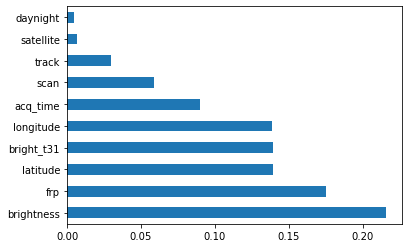

In [69]:
from sklearn.ensemble import ExtraTreesClassifier
featimp_fire_attributes = fire.drop(['confidence'], axis=1)
featimp_fire_class = fire["confidence"]
model = ExtraTreesClassifier()
model.fit(featimp_fire_attributes,featimp_fire_class)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=featimp_fire_attributes.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Correlation Matrix with Heatmap
We are finding the best features using Correlation Matrix with Heatmap
Ref: https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

In [70]:
!pip install seaborn

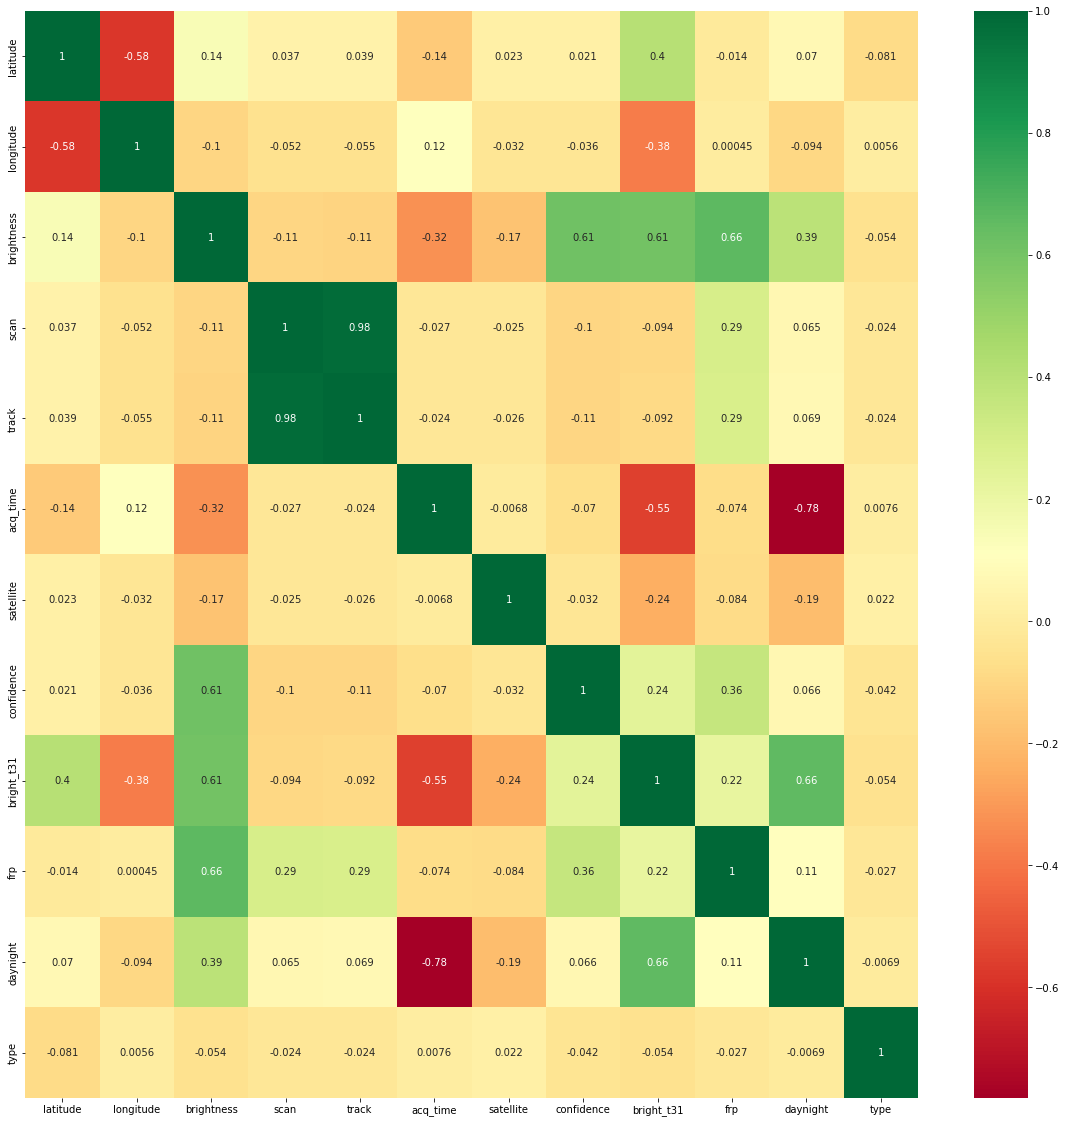

In [71]:
import seaborn as sns
corr_matrix = fire.corr()

top_corr_features = corr_matrix.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(fire[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Due to the incompatibility of negative values, the results of Univariate Selection are ignored. As for the other two methods, Feature Importance and Correlation with HeatMap, yield the same results as correlation matrix

### Creating 3 Datasets with Correlating Features  

We are now using Binning method to classify the target feature into 3 classes. If the confidence value is greater than 70%, we are classifying as HIGH Confidence (numerical value is 2). Confidence values between 40% and 70% are classified as MEDIUM Confidence (numerical value is 1) while values less than 40% are classified as LOW Confidence (numerical value is 0).

In [72]:
bins = [-1, 40, 70, 100] 
labels = [0,1,2]
#fire_class = fire
fire_class = fire.copy()

fire_class['conf_cat'] = pd.cut(fire_class['confidence'], bins=bins, labels=labels)

low_class = fire_class.copy()
med_class = fire_class.copy()
high_class = fire_class.copy()

#changing the dateset such that it becomes three different datasets having binary classification for each class
low_class['conf_cat'] = np.where(fire_class['conf_cat'] == 2,1, low_class['conf_cat'])
med_class['conf_cat'] = np.where(med_class['conf_cat'] == 2,0, med_class['conf_cat'])
high_class['conf_cat'] = np.where(high_class['conf_cat'] == 1,0, high_class['conf_cat'])

# Finding Correlating Features for each class Using Feature Importance

##### Low Class

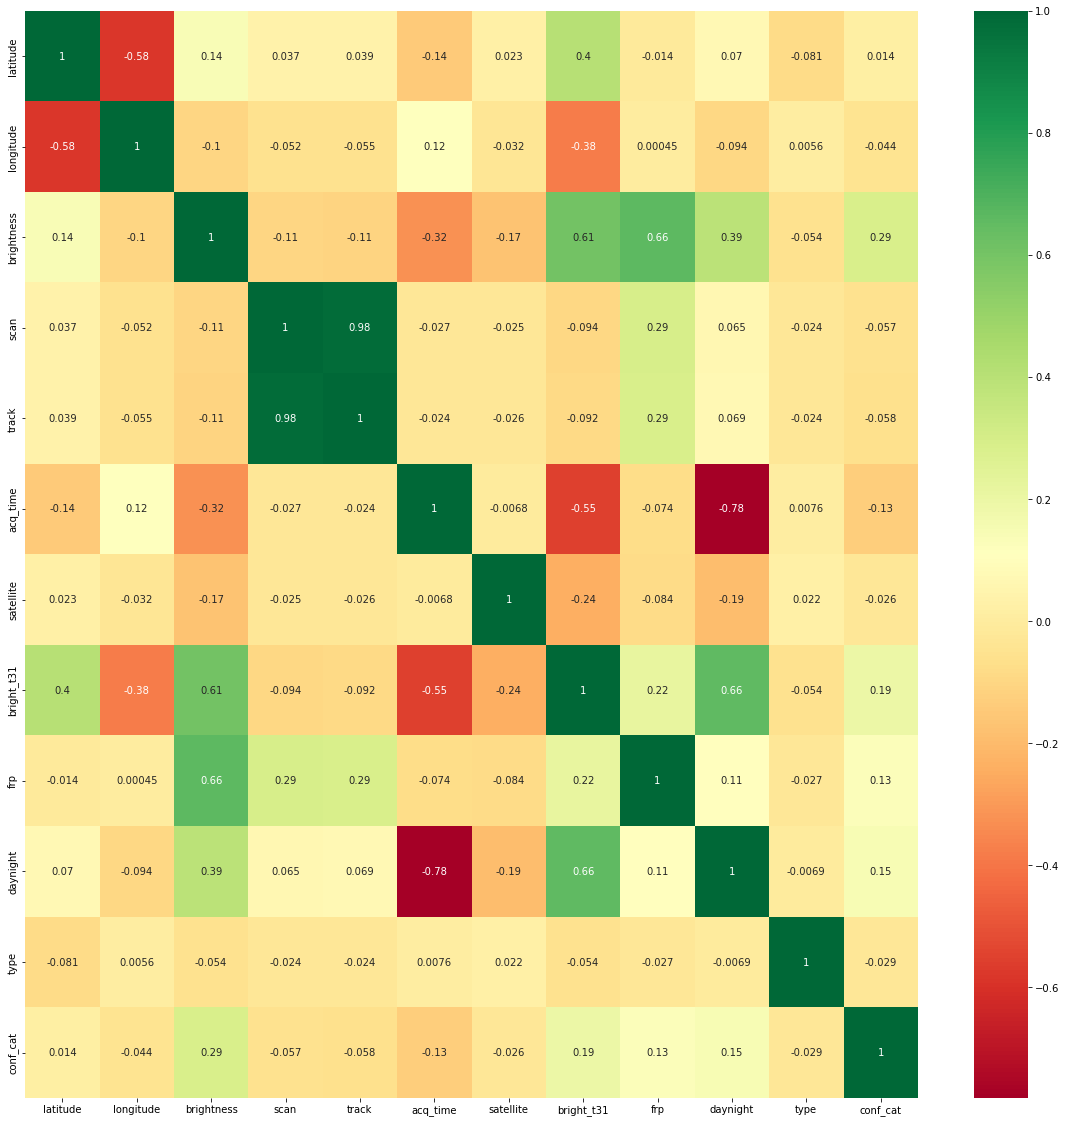

In [73]:
low_class = low_class.drop(['confidence'], axis=1)
corr_matrix_low = low_class.corr()

top_features_low = corr_matrix_low.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(low_class[top_features_low].corr(),annot=True,cmap="RdYlGn")

For low class the following are the observations:-

Top 2 features: brightness (0.29), bright_t31(0.19)

Top 5 features: brightness (0.29), bright_t31(0.19), daynight(0.16), frp(0.14), acq_time(-0.13)

Top 8 features: brightness (0.29), bright_t31(0.19), daynight(0.16), frp(0.14), acq_time(-0.13), scan(-0.051), track(-0.051), longitude(-0.042)

##### Medium Class

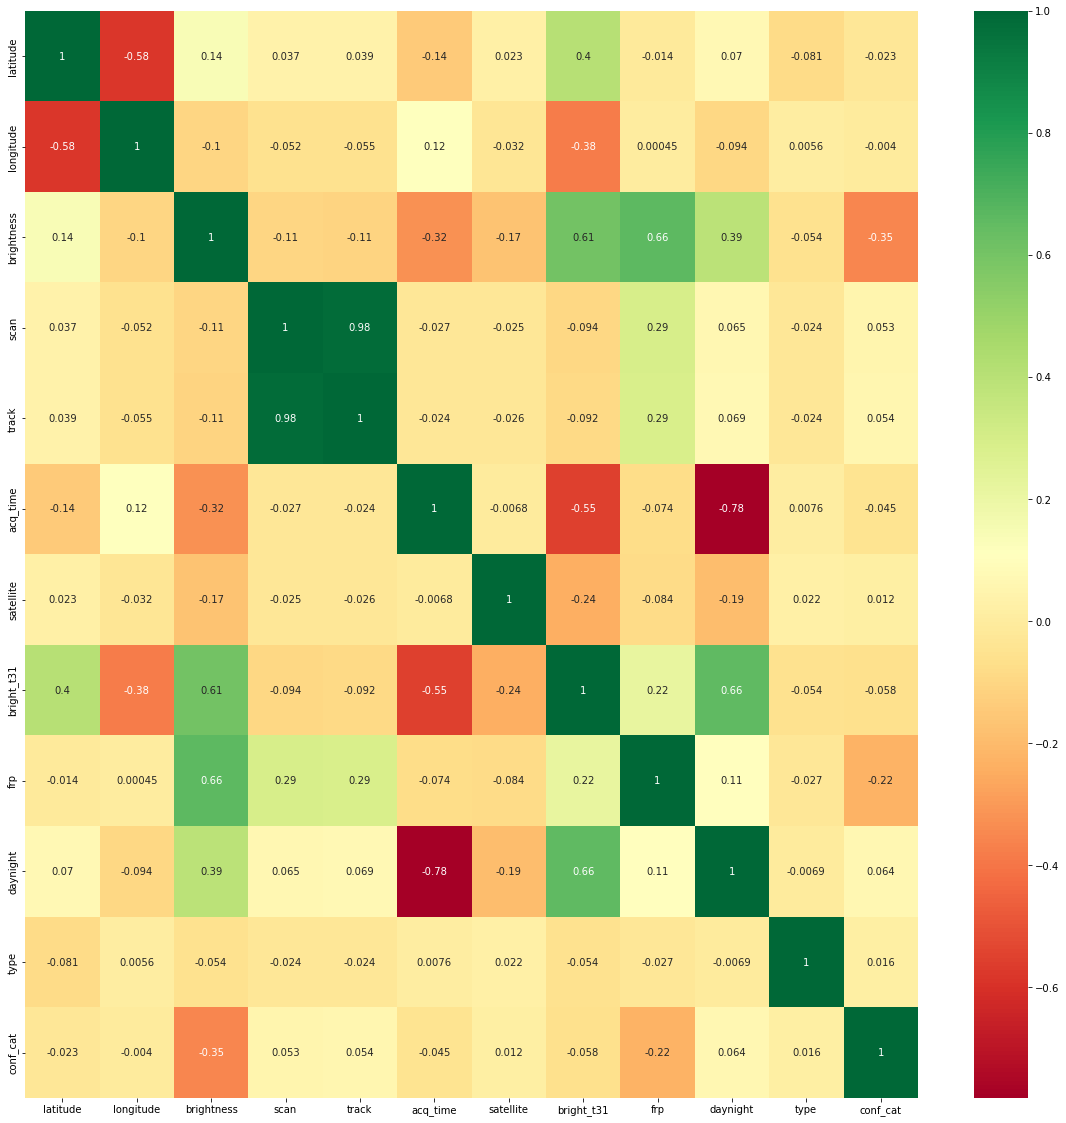

In [74]:
med_class = med_class.drop(['confidence'], axis=1)
corr_matrix_med = med_class.corr()

top_features_med = corr_matrix_med.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(med_class[top_features_med].corr(),annot=True,cmap="RdYlGn")

For med class the following are the observations:-

Top 2 features: brightness (-0.36), frp(-0.23)

Top 5 features: brightness (-0.36), frp(-0.23), daynight(0.066), bright_t31(-0.062), track(0.057)

Top 8 features: brightness (-0.36), frp(-0.23), daynight(0.066), bright_t31(-0.062), track(0.057), scan(0.056), acq_time(-0.046), latitude(-0.024)

##### High Class

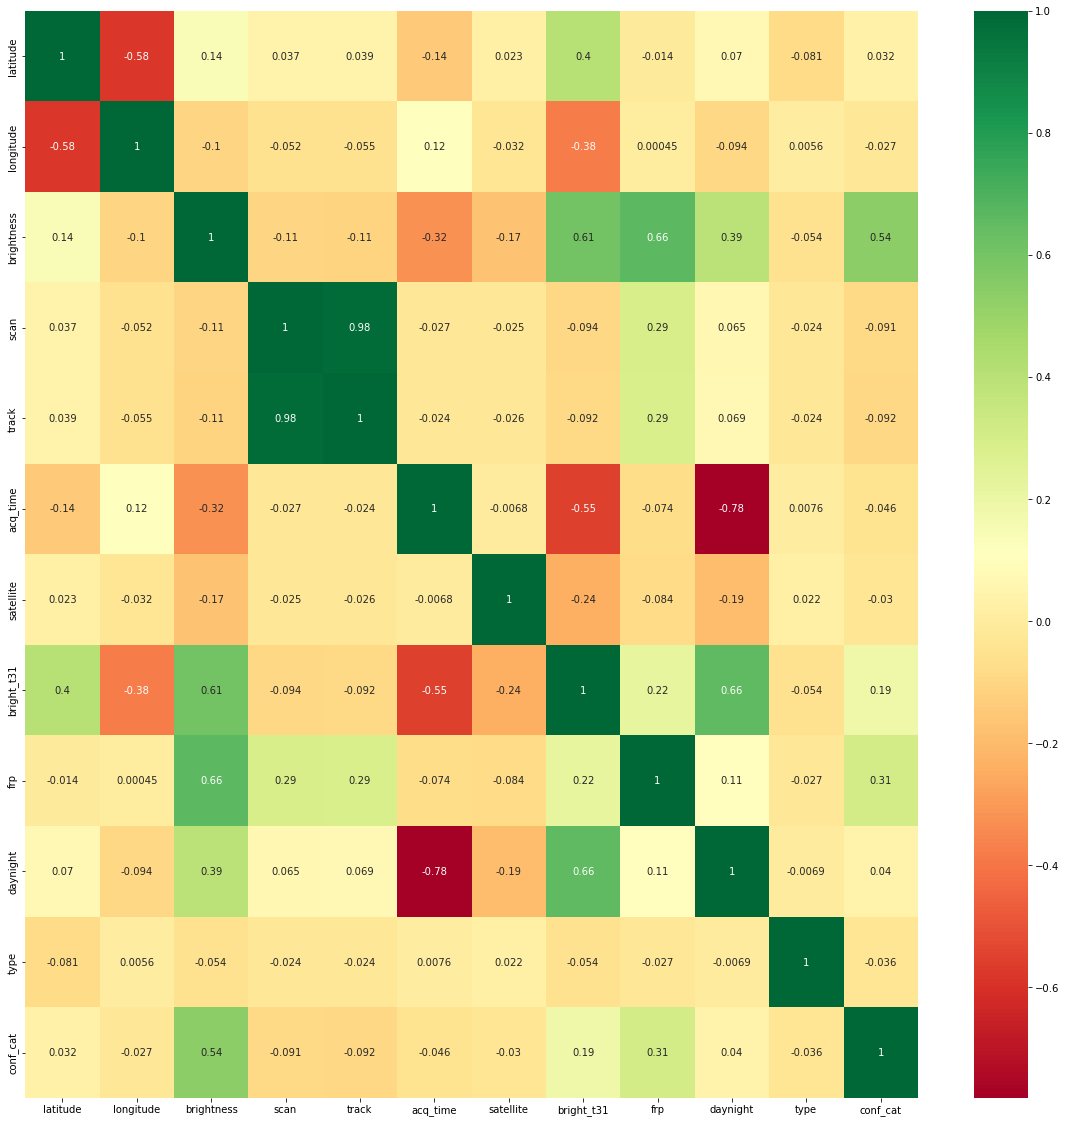

In [75]:
high_class = high_class.drop(['confidence'], axis=1)
corr_matrix_high = high_class.corr()

top_features_high = corr_matrix_high.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(high_class[top_features_high].corr(),annot=True,cmap="RdYlGn")

For high class the following are the observations:-

Top 2 features: brightness (0.54), frp(0.31)

Top 5 features: brightness (0.54), frp(0.31), bright_t31(0.19), track(-0.09),scan(-0.089) 

Top 8 features: brightness (0.54), frp(0.31), bright_t31(0.19), track(-0.09),scan(-0.089), acq_time(-0.047), daynight(0.042), latitude(0.031)

Therefore the three datasets will have the following features (considering the overlapping features) in them:-

Dataset 1 - brightness, frp, bright_t31

Dataset 2 - brightness, bright_t31, frp, daynight, acq_time, track, scan

Dataset 3 - brightness, bright_t31, frp, daynight, acq_time, track, scan, longitude, latitude
    

Dataset 1 containing the top 2 features of each class 

In [76]:
dataset_1 = fire_class.copy()
dataset_1 = dataset_1.drop(['latitude','longitude','scan','track','acq_time','satellite','daynight','type'], axis=1)
dataset_1

,brightness,confidence,bright_t31,frp,conf_cat
0,313.0,48,297.3,6.6,1
1,319.3,71,297.3,11.3,2
2,311.6,42,298.7,23.1,1
3,310.1,33,296.1,6.5,0
4,310.3,36,298.8,27.6,0
...,...,...,...,...,...
36006,312.7,85,292.9,14.2,2
36007,304.9,27,290.9,6.4,0
36008,301.7,43,290.4,5.5,1
36009,303.6,41,290.3,5.7,1


Dataset 2 containing the top 5 features of each class 

In [77]:
dataset_2 = fire_class.copy()
dataset_2 = dataset_2.drop(['latitude','longitude','satellite','type'], axis=1)
dataset_2

,brightness,scan,track,acq_time,confidence,bright_t31,frp,daynight,conf_cat
0,313.0,1.0,1.0,56,48,297.3,6.6,1,1
1,319.3,1.0,1.0,56,71,297.3,11.3,1,2
2,311.6,3.1,1.7,57,42,298.7,23.1,1,1
3,310.1,1.1,1.1,57,33,296.1,6.5,1,0
4,310.3,4.0,1.9,57,36,298.8,27.6,1,0
...,...,...,...,...,...,...,...,...,...
36006,312.7,1.2,1.1,1644,85,292.9,14.2,0,2
36007,304.9,1.0,1.0,1644,27,290.9,6.4,0,0
36008,301.7,1.0,1.0,1644,43,290.4,5.5,0,1
36009,303.6,1.0,1.0,1644,41,290.3,5.7,0,1


Dataset 3 containing the top 8 features of each class 

In [78]:
dataset_3 = fire_class.copy()
dataset_3 = dataset_3.drop(['satellite','type'], axis=1)
dataset_3

,latitude,longitude,brightness,scan,track,acq_time,confidence,bright_t31,frp,daynight,conf_cat
0,-11.8070,142.0583,313.0,1.0,1.0,56,48,297.3,6.6,1,1
1,-11.7924,142.0850,319.3,1.0,1.0,56,71,297.3,11.3,1,2
2,-12.8398,132.8744,311.6,3.1,1.7,57,42,298.7,23.1,1,1
3,-14.4306,143.3035,310.1,1.1,1.1,57,33,296.1,6.5,1,0
4,-12.4953,131.4897,310.3,4.0,1.9,57,36,298.8,27.6,1,0
...,...,...,...,...,...,...,...,...,...,...,...
36006,-28.0656,131.6334,312.7,1.2,1.1,1644,85,292.9,14.2,0,2
36007,-28.2625,128.5494,304.9,1.0,1.0,1644,27,290.9,6.4,0,0
36008,-28.2941,128.5123,301.7,1.0,1.0,1644,43,290.4,5.5,0,1
36009,-28.3001,128.5530,303.6,1.0,1.0,1644,41,290.3,5.7,0,1


  # Scikit Learn PCA on original dataset

In [79]:
from sklearn.preprocessing import StandardScaler
features = ['bright_t31','latitude', 'longitude', 'scan', 'track','acq_time','satellite','daynight','type','brightness','frp']
# Separating out the features
x = fire_class.loc[:, features].values
# Separating out the target
y = fire_class.loc[:,['confidence']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
x

array([[-0.41536427,  1.00389302,  0.33762684, ..., -0.0980141 ,
        -0.82930942, -0.4825828 ],
       [-0.41536427,  1.00590247,  0.34050981, ..., -0.0980141 ,
        -0.4976003 , -0.43165021],
       [-0.27139544,  0.86174521, -0.65401884, ..., -0.0980141 ,
        -0.90302256, -0.30377689],
       ...,
       [-1.12492494, -1.26528325, -1.12502328, ..., -0.0980141 ,
        -1.42427974, -0.49450319],
       [-1.13520843, -1.26610905, -1.12062864, ..., -0.0980141 ,
        -1.32424049, -0.49233585],
       [-1.0735075 , -1.61900119, -1.88224111, ...,  9.98651662,
        -1.03465316, -0.30486056]])

In [80]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['component 1', 'component 2'])

In [81]:
finalDf = pd.concat([principalDf, fire_class[['confidence']]], axis = 1)
finalDf

,component 1,component 2,confidence
0,-0.092919,-1.222000,48
1,0.057802,-1.226101,71
2,0.412299,2.429671,42
3,-0.315188,-0.837316,33
4,0.526831,3.724639,36
...,...,...,...
36006,-2.562868,-0.431047,85
36007,-2.817568,-0.840503,27
36008,-2.916588,-0.827088,43
36009,-2.880729,-0.830654,41


In [82]:
pca.explained_variance_ratio_

array([0.27704993, 0.19335851])

## PCA using Explained Variance

In [83]:
from sklearn.preprocessing import StandardScaler
features = ['bright_t31','latitude', 'longitude', 'scan', 'track','acq_time','satellite','daynight','type','brightness','frp']
# Separating out the features
x = fire_class.loc[:, features].values
# Separating out the target
y = fire_class.loc[:,['confidence']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
x

array([[-0.41536427,  1.00389302,  0.33762684, ..., -0.0980141 ,
        -0.82930942, -0.4825828 ],
       [-0.41536427,  1.00590247,  0.34050981, ..., -0.0980141 ,
        -0.4976003 , -0.43165021],
       [-0.27139544,  0.86174521, -0.65401884, ..., -0.0980141 ,
        -0.90302256, -0.30377689],
       ...,
       [-1.12492494, -1.26528325, -1.12502328, ..., -0.0980141 ,
        -1.42427974, -0.49450319],
       [-1.13520843, -1.26610905, -1.12062864, ..., -0.0980141 ,
        -1.32424049, -0.49233585],
       [-1.0735075 , -1.61900119, -1.88224111, ...,  9.98651662,
        -1.03465316, -0.30486056]])

In [84]:
pca2 = PCA(n_components=0.95)
X_reduced_array = pca2.fit_transform(x)

In [85]:
print (X_reduced_array)
print(len(X_reduced_array[0]))

[[-0.09291886 -1.22199975 -0.74590075 ... -1.10437679 -0.86520357
   0.72691645]
 [ 0.05780172 -1.22610123 -0.63678724 ... -1.14381316 -0.88033067
   0.69795219]
 [ 0.41229896  2.42967147 -1.60399185 ... -0.84272302 -0.18779678
   0.20869135]
 ...
 [-2.91658842 -0.82708812 -0.53969825 ...  1.19600065  1.70056787
   0.24651396]
 [-2.88072853 -0.83065429 -0.50734758 ...  1.18455967  1.69399317
   0.23888957]
 [-2.9390119   0.4203626  -0.23954895 ...  6.75462511  1.46785647
  -0.17553158]]
8


In [86]:
X_reduced = pd.DataFrame(X_reduced_array, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8'])
X_reduced.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
0,-0.092919,-1.222000,-0.745901,-1.077375,0.337377,-1.104377,-0.865204,0.726916
1,0.057802,-1.226101,-0.636787,-0.910440,0.392263,-1.143813,-0.880331,0.697952
2,0.412299,2.429671,-1.603992,-1.523198,0.324599,-0.842723,-0.187797,0.208691
3,-0.315188,-0.837316,-0.518225,-1.293686,0.302660,-1.114778,-0.715054,0.677776
4,0.526831,3.724639,-1.857824,-1.720399,0.294070,-0.767367,-0.156512,0.036947


In [87]:
pca2.explained_variance_ratio_

array([0.27704993, 0.19335851, 0.14166797, 0.11511845, 0.09112564,
       0.08817592, 0.03785859, 0.02530256])

# Classifier on the original dataset and the three subsets

##### Classifier on Original Dataset

In [88]:
from sklearn.model_selection import train_test_split
  
features = ['bright_t31','latitude', 'longitude', 'scan', 'track','acq_time','satellite','daynight','type','brightness','frp']
# Separating out the features
x = fire_class.loc[:, features].values
# Separating out the target
y = fire_class.loc[:,['conf_cat']].values
# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(x,y ,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier


P = X_test

#{Decision Tree Model}
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
print ("\n1) Using Decision Tree Prediction is " + str(clf.predict(P)))
predicted_y = clf.predict(P)


1) Using Decision Tree Prediction is [2 0 2 ... 1 0 2]


In [90]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predicted_y)

0.676107964011996

##### Classifier on Dataset_1 Containing top 2 features of each class

In [91]:
from sklearn.model_selection import train_test_split
  
features = ['bright_t31','brightness','frp']
# Separating out the features
x = dataset_1.loc[:, features].values
# Separating out the target
y = dataset_1.loc[:,['conf_cat']].values
# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(x,y ,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier


P = X_test

#{Decision Tree Model}
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
print ("\n1) Using Decision Tree Prediction is " + str(clf.predict(P)))
predicted_y = clf.predict(P)


1) Using Decision Tree Prediction is [2 1 0 ... 0 1 2]


In [93]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predicted_y)

0.6117960679773409

##### Classifier on Dataset_2 Containing top 5 features of each class

In [94]:
from sklearn.model_selection import train_test_split
  
features = ['bright_t31','brightness','frp', 'scan', 'track', 'acq_time', 'daynight']
# Separating out the features
x = dataset_2.loc[:, features].values
# Separating out the target
y = dataset_2.loc[:,['conf_cat']].values
# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(x,y ,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier


P = X_test

#{Decision Tree Model}
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
print ("\n1) Using Decision Tree Prediction is " + str(clf.predict(P)))
predicted_y = clf.predict(P)


1) Using Decision Tree Prediction is [2 1 2 ... 1 1 2]


In [96]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predicted_y)

0.666555592580251

##### Classifier on Dataset_3 Containing top 7 features of each class

In [97]:
from sklearn.model_selection import train_test_split
  
features = ['bright_t31','brightness','frp', 'scan', 'track', 'acq_time', 'daynight', 'latitude', 'longitude']
# Separating out the features
x = dataset_3.loc[:, features].values
# Separating out the target
y = dataset_3.loc[:,['conf_cat']].values
# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(x,y ,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier


P = X_test

#{Decision Tree Model}
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
print ("\n1) Using Decision Tree Prediction is " + str(clf.predict(P)))
predicted_y = clf.predict(P)


1) Using Decision Tree Prediction is [2 0 2 ... 1 0 2]


In [99]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predicted_y)

0.6757747417527491

# LAB 4

As multiclass problem is not supported to calculate ROC, we are redefining our dataset into a binary classifier

In [100]:
fire_class.head()

,latitude,longitude,brightness,scan,track,acq_time,satellite,confidence,bright_t31,frp,daynight,type,conf_cat
0,-11.8070,142.0583,313.0,1.0,1.0,56,1,48,297.3,6.6,1,0,1
1,-11.7924,142.0850,319.3,1.0,1.0,56,1,71,297.3,11.3,1,0,2
2,-12.8398,132.8744,311.6,3.1,1.7,57,1,42,298.7,23.1,1,0,1
3,-14.4306,143.3035,310.1,1.1,1.1,57,1,33,296.1,6.5,1,0,0
4,-12.4953,131.4897,310.3,4.0,1.9,57,1,36,298.8,27.6,1,0,0


We are considering confidence values above 70% as High Confidence(1) and below 70% as Low Confidence(0)

In [101]:
fire_binary_class= fire_class.copy()
bins = [-1, 70, 100] 
labels = [0,1]
#fire_class = fire

fire_binary_class['conf_cat'] = pd.cut(fire_class['confidence'], bins=bins, labels=labels)
#fire_binary_class.head(20)

We are now splitting our dataset into train and test sets. The following code splits the dataset such that 75% of the original dataset are train sets and the remianing 25% are test sets

In [102]:
from sklearn.model_selection import train_test_split
  
features = ['bright_t31','latitude', 'longitude', 'scan', 'track','acq_time','satellite','daynight','type','brightness','frp']
# Separating out the features
x = fire_binary_class.loc[:, features].values
# Separating out the target
y = fire_binary_class.loc[:,['conf_cat']].values
# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(x,y ,random_state=104, test_size=0.25, shuffle=True)

Even though the datasets now represent a binary classifier, we are further simplifying it by representing the 1s as true and 0s as false

In [103]:
y_train_1 = (y_train == 1) ## True for all 1s, False for all other digits
y_test_1 = (y_test == 1)

Now to predict the classes, we are initially going to fit the Stochastic Gradient Descent Classifier on the training dataset

In [104]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_1.ravel())

SGDClassifier(random_state=42)

#### Performance Evaluation

Cross Validation Evaluation

In [105]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_1.ravel(), cv=3, scoring="accuracy")

array([0.76496723, 0.74930579, 0.80071095])

We are getting above 69% accuracy (ratio of correct predictions)

Confusion Matrix

In [106]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_1.ravel(), cv=3)

In [107]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_1, y_train_pred)

array([[10794,  2944],
       [ 3223, 10047]])

12025 - True Negatives

1713 - False Positives

5140 - False Negatives

8130 - True Positives

The following demonstrates an ideal confusion matrix

In [108]:
y_train_perfect_predictions = y_train_1  # pretend we reached perfection
confusion_matrix(y_train_1, y_train_perfect_predictions)

array([[13738,     0],
       [    0, 13270]])

Precision, Recall

In [109]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_1, y_train_pred ,average='macro')

0.771723246512297

In [110]:
recall_score(y_train_1, y_train_pred, average='macro')

0.7714126066643021

The classifier has a 76% precision meaning it is correct 76% of the time
The classifier has a 74% recall meaning it can only detect 74% of the actual Trues(in this case high confidence)

In [111]:
from sklearn.metrics import f1_score

f1_score(y_train_1, y_train_pred , average='macro')

0.7714854372200146

ROCs of multiple classifiers

In [112]:
y_scores = sgd_clf.decision_function(X_train)
y_scores

array([  455.46446678, -1188.12975462, 12812.24490473, ...,
        -802.72442293,   655.93684817,   937.51665829])

In [113]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_1, y_scores)

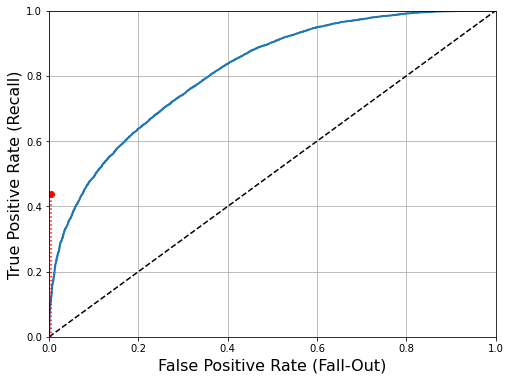

In [114]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
plt.show()

In [115]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_1, y_scores)

0.8146710431837587

In [116]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_1.ravel(), cv=3,
                                    method="predict_proba")

In [117]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_1,y_scores_forest)

In [118]:
cross_val_score(forest_clf, X_train, y_train_1.ravel(), cv=3, scoring="accuracy")

array([0.85415972, 0.86493391, 0.86214175])

In [119]:
y_train_pred = cross_val_predict(forest_clf, X_train, y_train_1.ravel(), cv=3)

In [120]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_1, y_train_pred)

array([[11787,  1951],
       [ 1819, 11451]])

In [121]:
precision_score(y_train_1, y_train_pred ,average='macro')

0.8603668470306043

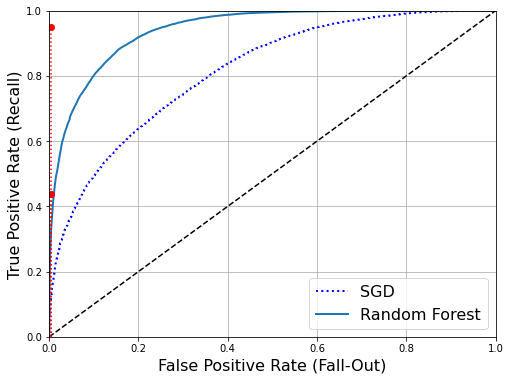

In [122]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
plt.plot([4.837e-3], [0.4368], "ro")
plt.plot([4.837e-3, 4.837e-3], [0., 0.9487], "r:")
plt.plot([4.837e-3], [0.9487], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [123]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_1, y_scores_forest)

0.9418167892335003

In [124]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_1.ravel(), cv=3)
precision_score(y_train_1.ravel(), y_train_pred_forest)

0.8544247127294433

In [125]:
recall_score(y_train_1, y_train_pred_forest)

0.8629238884702336

KNN Classification

In [126]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train_1.ravel())

KNeighborsClassifier(n_neighbors=3)

In [127]:
y_probas_knn = cross_val_predict(knn, X_train, y_train_1.ravel(), cv=3,
                                    method="predict_proba")

In [128]:
cross_val_score(knn, X_train, y_train_1.ravel(), cv=3, scoring="accuracy")

array([0.81961568, 0.82805731, 0.82714952])

In [129]:
y_train_pred = cross_val_predict(knn, X_train, y_train_1.ravel(), cv=3)

In [130]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_1, y_train_pred)

array([[11343,  2395],
       [ 2333, 10937]])

In [131]:
y_scores_knn = y_probas_knn[:, 1] # score = proba of positive class
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_train_1,y_scores_knn)

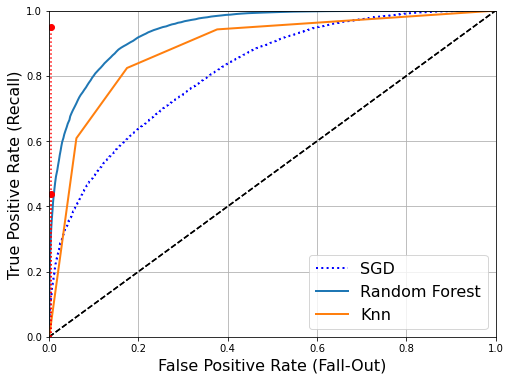

In [132]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plot_roc_curve(fpr_knn, tpr_knn, "Knn")
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
plt.plot([4.837e-3], [0.4368], "ro")
plt.plot([4.837e-3, 4.837e-3], [0., 0.9487], "r:")
plt.plot([4.837e-3], [0.9487], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [133]:
roc_auc_score(y_train_1, y_scores_knn)

0.8839826012985177

In [134]:
y_train_pred_knn = cross_val_predict(knn, X_train, y_train_1.ravel(), cv=3)
precision_score(y_train_1.ravel(), y_train_pred_knn)

0.8203570357035703

In [135]:
recall_score(y_train_1.ravel(), y_train_pred_knn)

0.8241899020346647

It is evident from the above plot that the Ranndom Forest Classifier has higher AUC(Area under the curve) compared to other classifiers. 

In [136]:
fire_new = pd.read_csv('fire_archive.csv')
fire_new = fire_new.drop(['acq_date','instrument','type'], axis = 1)
fire_num = fire_new.drop(['satellite', 'daynight'], axis =1)

In [137]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(fire_new)
cat_attribs = ["daynight", "satellite"]

cats_pipeline = ColumnTransformer([
        #  Apply the numerical transformation to the all numeric columns
        ("cat", OneHotEncoder(), cat_attribs), # Apply the One Hot Encoding to the all categorical columns
    ])

fire_prepared = cats_pipeline.fit_transform(fire_new) #Now fit_transform applies all the transformation to the data 

In [138]:
fire_prepared.shape

(36011, 4)

In [139]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
    
        ('std_scaler', StandardScaler()),
    ])

fire_num_tr = num_pipeline.fit_transform(fire_num)

In [140]:
fire_num_tr

array([[ 1.00389302e+00,  3.37626840e-01, -8.29309421e-01, ...,
         1.77635684e-15, -4.15364274e-01, -4.82582800e-01],
       [ 1.00590247e+00,  3.40509813e-01, -4.97600303e-01, ...,
         1.77635684e-15, -4.15364274e-01, -4.31650208e-01],
       [ 8.61745209e-01, -6.54018845e-01, -9.03022558e-01, ...,
         1.77635684e-15, -2.71395443e-01, -3.03776892e-01],
       ...,
       [-1.26528325e+00, -1.12502328e+00, -1.42427974e+00, ...,
         1.77635684e-15, -1.12492494e+00, -4.94503194e-01],
       [-1.26610905e+00, -1.12062864e+00, -1.32424049e+00, ...,
         1.77635684e-15, -1.13520843e+00, -4.92335849e-01],
       [-1.61900119e+00, -1.88224111e+00, -1.03465316e+00, ...,
         1.77635684e-15, -1.07350750e+00, -3.04860564e-01]])

In [141]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(fire_num)


full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),#  Apply the numerical transformation to the all numeric columns
        ("cat", cats_pipeline, cat_attribs), # Apply the One Hot Encoding to the all categorical columns
    ])

fire_new_prepared = full_pipeline.fit_transform(fire_new) #Now fit_transform applies all the transformation to the data 

In [142]:
fire_new_prepared.shape

(36011, 14)

## Lab5 

- Complement Naive Bayes

In [143]:
from sklearn.naive_bayes import ComplementNB

In [144]:
clf_complement = ComplementNB()

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [145]:
clf_complement.fit(X_train, y_train_1.ravel())

ComplementNB()

In [146]:
cross_val_score(clf_complement, X_train, y_train_1.ravel(), cv=3, scoring="accuracy")

array([0.63656559, 0.64089748, 0.62886025])

In [147]:
y_train_pred = cross_val_predict(clf_complement, X_train, y_train_1.ravel(), cv=3)

In [148]:
conf_mat = confusion_matrix(y_train_1, y_train_pred)

In [149]:
tn = conf_mat[0][0]
fn = conf_mat[0][1]
fp = conf_mat[1][0]
tp = conf_mat[1][1]
print(tn, fn, fp, tp)

8030 5708 4138 9132


In [150]:
specificity = tn/(tn+fp)
print(specificity)

0.6599276791584484


In [151]:
sensitivity = tp/(tp+fn)
print(sensitivity)

0.6153638814016172


In [152]:
precision = tp/(tp+fp)
print (precision)

0.6881688018085909


In [153]:
precision_score(y_train_1, y_train_pred ,average='macro')

0.6376457802800328

In [154]:
recall_score(y_train_1, y_train_pred ,average='macro')

0.6363394598648429

In [155]:
Cross_validated_ROC_AUC = cross_val_score(clf_complement, X_train, y_train_1.ravel(), cv=3, scoring="roc_auc").mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.7160


In [156]:
fpr, tpr, thresholds = roc_curve(y_train_1, y_train_pred)

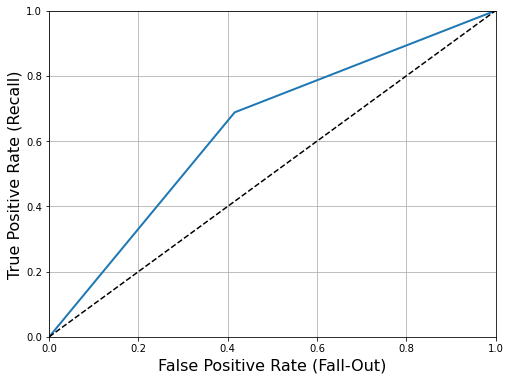

In [157]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
#plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
#plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
#plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
plt.show()

- Bernoulli Naive Bayes

In [158]:
from sklearn.naive_bayes import BernoulliNB

In [159]:
clf_bernoulli = BernoulliNB()

In [160]:
cross_val_score(clf_bernoulli, X_train, y_train_1.ravel(), cv=3, scoring="accuracy")

array([0.52882373, 0.53515495, 0.53876916])

In [161]:
y_train_pred = cross_val_predict(clf_bernoulli, X_train, y_train_1.ravel(), cv=3)

In [162]:
conf_mat = confusion_matrix(y_train_1, y_train_pred)

In [163]:
tn = conf_mat[0][0]
fn = conf_mat[0][1]
fp = conf_mat[1][0]
tp = conf_mat[1][1]
print(tn, fn, fp, tp)

9901 3837 8742 4528


In [164]:
specificity = tn/(tn+fp)
print(specificity)

0.5310840529957624


In [165]:
sensitivity = tp/(tp+fn)
print(sensitivity)

0.5413030484160192


In [166]:
precision = tp/(tp+fp)
print (precision)

0.3412207987942728


In [167]:
precision_score(y_train_1, y_train_pred ,average='macro')

0.5361935507058908

In [168]:
recall_score(y_train_1, y_train_pred ,average='macro')

0.5309612510494875

In [169]:
Cross_validated_ROC_AUC = cross_val_score(clf_bernoulli, X_train, y_train_1.ravel(), cv=3, scoring="roc_auc").mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.5471


In [170]:
fpr, tpr, thresholds = roc_curve(y_train_1, y_train_pred)

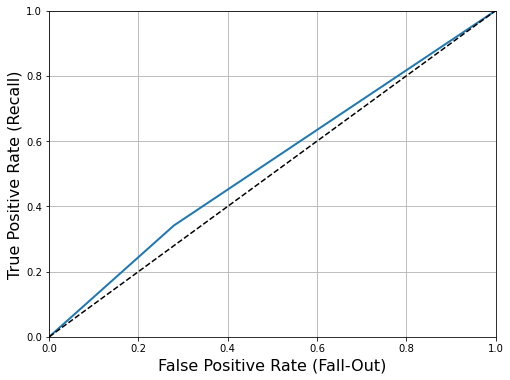

In [171]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
#plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
#plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
#plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
plt.show()

- Gaussian Naive Bayes

In [172]:
from sklearn.naive_bayes import GaussianNB

In [173]:
clf_gaussian = GaussianNB()

In [174]:
cross_val_score(clf_gaussian, X_train, y_train_1.ravel(), cv=3, scoring="accuracy")

array([0.74808397, 0.74430745, 0.75238836])

In [175]:
y_train_pred = cross_val_predict(clf_gaussian, X_train, y_train_1.ravel(), cv=3)

In [176]:
conf_mat = confusion_matrix(y_train_1, y_train_pred)

In [177]:
tn = conf_mat[0][0]
fn = conf_mat[0][1]
fp = conf_mat[1][0]
tp = conf_mat[1][1]
print(tn, fn, fp, tp)

12380 1358 5441 7829


In [178]:
specificity = tn/(tn+fp)
print(specificity)

0.6946860445541777


In [179]:
sensitivity = tp/(tp+fn)
print(sensitivity)

0.8521824316969631


In [180]:
precision = tp/(tp+fp)
print (precision)

0.5899773926149209


In [181]:
precision_score(y_train_1, y_train_pred ,average='macro')

0.7734342381255703

In [182]:
recall_score(y_train_1, y_train_pred ,average='macro')

0.7455637436214799

In [183]:
Cross_validated_ROC_AUC = cross_val_score(clf_gaussian, X_train, y_train_1.ravel(), cv=3, scoring="roc_auc").mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.7944


In [184]:
fpr, tpr, thresholds = roc_curve(y_train_1, y_train_pred)

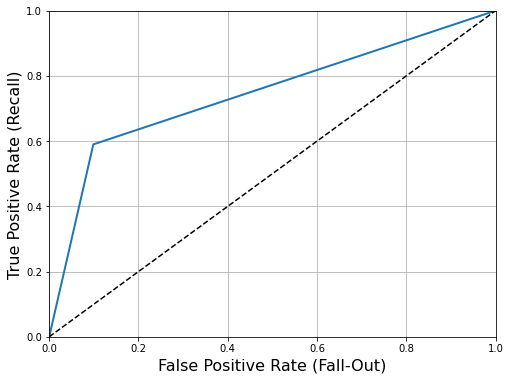

In [185]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
#plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
#plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
#plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
plt.show()

- Multinomial Naive Bayes

In [186]:
from sklearn.naive_bayes import MultinomialNB

clf_multinomial = MultinomialNB()

clf_multinomial.fit(X_train, y_train_1.ravel())

MultinomialNB()

In [187]:
cross_val_score(clf_multinomial, X_train, y_train_1.ravel(), cv=3, scoring="accuracy")

array([0.64733978, 0.65178274, 0.64507887])

In [188]:
y_train_pred = cross_val_predict(clf_multinomial, X_train, y_train_1.ravel(), cv=3)

In [189]:
conf_mat = confusion_matrix(y_train_1, y_train_pred)

In [190]:
tn = conf_mat[0][0]
fn = conf_mat[0][1]
fp = conf_mat[1][0]
tp = conf_mat[1][1]
print(tn, fn, fp, tp)

9274 4464 5041 8229


In [191]:
specificity = tn/(tn+fp)
print(specificity)

0.6478519035976249


In [192]:
sensitivity = tp/(tp+fn)
print(sensitivity)

0.6483100921767904


In [193]:
precision = tp/(tp+fp)
print (precision)

0.620120572720422


In [194]:
precision_score(y_train_1, y_train_pred ,average='macro')

0.6480809978872076

In [195]:
recall_score(y_train_1, y_train_pred ,average='macro')

0.6475912224498892

In [196]:
Cross_validated_ROC_AUC = cross_val_score(clf_multinomial, X_train, y_train_1.ravel(), cv=3, scoring="roc_auc").mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.7160


In [197]:
fpr, tpr, thresholds = roc_curve(y_train_1, y_train_pred)

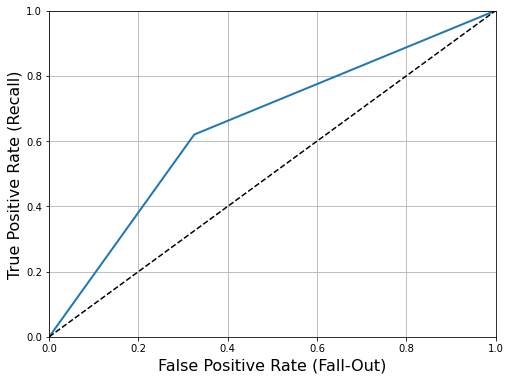

In [198]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
#plt.plot([4.837e-3, 4.837e-3], [0., 0.6475], "r:") # Not shown
#plt.plot([0.0, 4.837e-3], [0.65, 0.65], "r:")  # Not shown
#plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
plt.show()

- Categorical Naive Bayes

In [199]:
from sklearn.naive_bayes import CategoricalNB
clf_categorical = CategoricalNB()

In [200]:

clf_categorical.fit(X_train, y_train.ravel())

CategoricalNB()

In [201]:
y_pred = clf_categorical.predict(X_test)
print(accuracy_score(y_train_1, y_train_pred))

0.6480672393364929


In [202]:
conf_mat = confusion_matrix(y_train_1, y_train_pred)

tn = conf_mat[0][0]
fn = conf_mat[0][1]
fp = conf_mat[1][0]
tp = conf_mat[1][1]
print(tn, fn, fp, tp)

9274 4464 5041 8229


## Lab 6

#### K Means Clustering

In [317]:
conda install -c conda-forge kneed

Solving environment: done

## Package Plan ##

  environment location: /Users/yehiagomaa/opt/anaconda3

  added / updated specs:
    - kneed


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-22.9.0               |   py39h6e9494a_2         962 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         962 KB

The following packages will be UPDATED:

  conda                               22.9.0-py39h6e9494a_1 --> 22.9.0-py39h6e9494a_2 None



conda-22.9.0         | 962 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [428]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.mixture import GaussianMixture
from sklearn import *
from kneed import KneeLocator
from scipy.spatial.distance import cdist

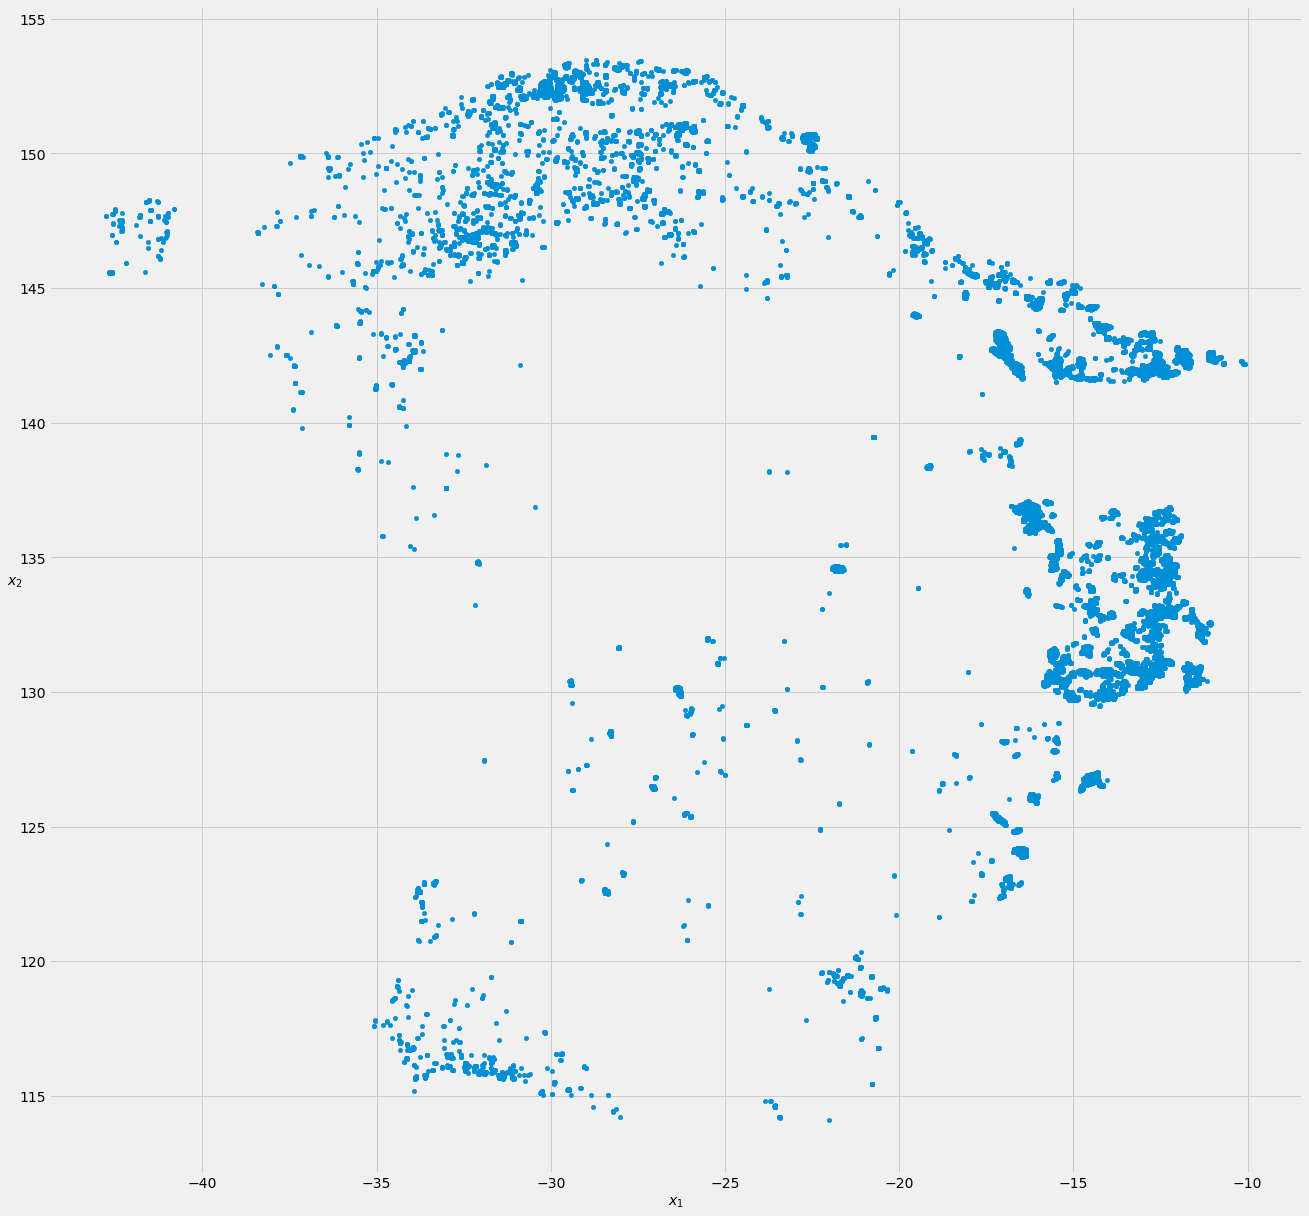

In [370]:
#Pre clustering
def plot_clusters(X_train, y=None):
    plt.scatter(X[:, 0], X[:, 1],c=y, s=20) #s is the size of dots.
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    
plt.figure(figsize=(20, 20))
plot_clusters(X_train)
plt.show()

In [435]:
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)

In [436]:
kmeans.fit(X_train)

KMeans(init='random', n_clusters=3, random_state=42)

In [437]:
y_pred = kmeans.fit_predict(X_train)

In [438]:
# Number of iterations required to converge
kmeans.n_iter_ 

8

In [439]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

In [440]:
cluster_center = kmeans.cluster_centers_
cluster_center

array([[ 2.85839677e-01,  7.27264258e-01,  6.26013275e-01,
         1.71909252e-01,  2.25972740e-01,  1.84602101e-01,
        -3.21964677e-15,  1.00000000e+00,  5.15241504e-03,
         1.68931828e-01,  1.66262257e-02],
       [ 1.58547183e-01,  6.94614974e-01,  6.69820039e-01,
         1.37780672e-01,  1.83583618e-01,  5.98827307e-01,
         6.16894198e-01, -9.99200722e-16,  6.82593857e-03,
         7.09122012e-02,  8.65498215e-03],
       [ 2.60876751e-01,  7.41643615e-01,  6.00554742e-01,
         1.70719375e-01,  2.23381160e-01,  1.14733793e-01,
         1.00000000e+00,  1.00000000e+00,  8.77521314e-03,
         1.44632740e-01,  1.30586445e-02]])

In [441]:
# lowest sum squared error(SSE) value 
kmeans.inertia_

8040.838434383964

In [442]:
def plot_data(X_train):
    plt.plot(X_train[:, 0], X_train[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)
    
def plot_decision_boundaries(clusterer,X_train, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X_train.min(axis=1) - 0.1
    maxs = X_train.max(axis=1) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')
    plot_data(X_train)
    if show_centroids:
        plot_centroids(cluster_center)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)


In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X_train)
plt.show()

#### Elbow Point

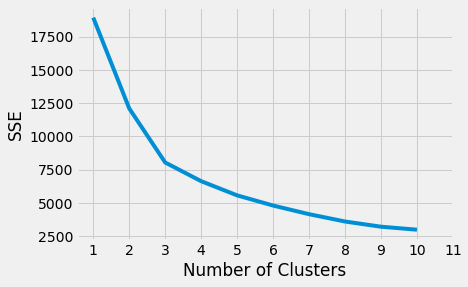

In [326]:
#run several k-means, increment k with each iteration, and record the SSE

kmeans_kwargs = {"init": "random","n_init": 10, "max_iter": 300,"random_state": 42}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_train)
    sse.append(kmeans.inertia_)

#Plotting SSE Curve    
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [327]:
#Finding the elbow point using code because it may not be obvious everytime
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

3

#### Silhouette Coefficient

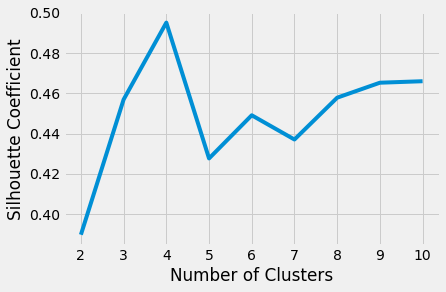

In [328]:
silhouette_coefficients = []
# start at 2 clusters for silhouette coefficient
# function needs a minimum of two clusters, or it will raise an exception.
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_coefficients.append(score)


#Plotting Silhouette coefficient
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.38982085584249243
For n_clusters = 3 The average silhouette_score is : 0.45686781977623436
For n_clusters = 4 The average silhouette_score is : 0.4950105842968593
For n_clusters = 5 The average silhouette_score is : 0.42764225553209667
For n_clusters = 6 The average silhouette_score is : 0.4490605296165835


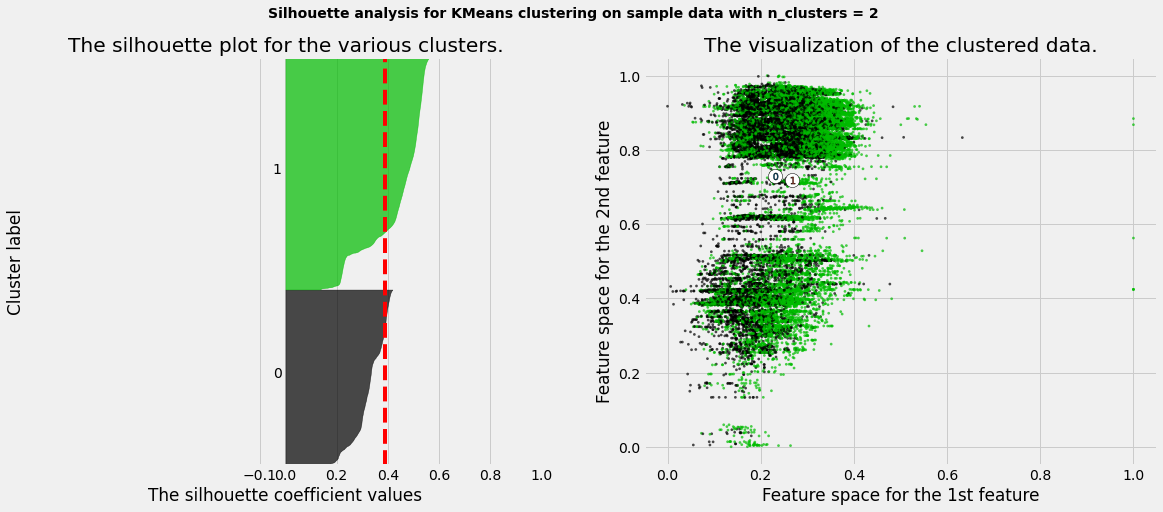

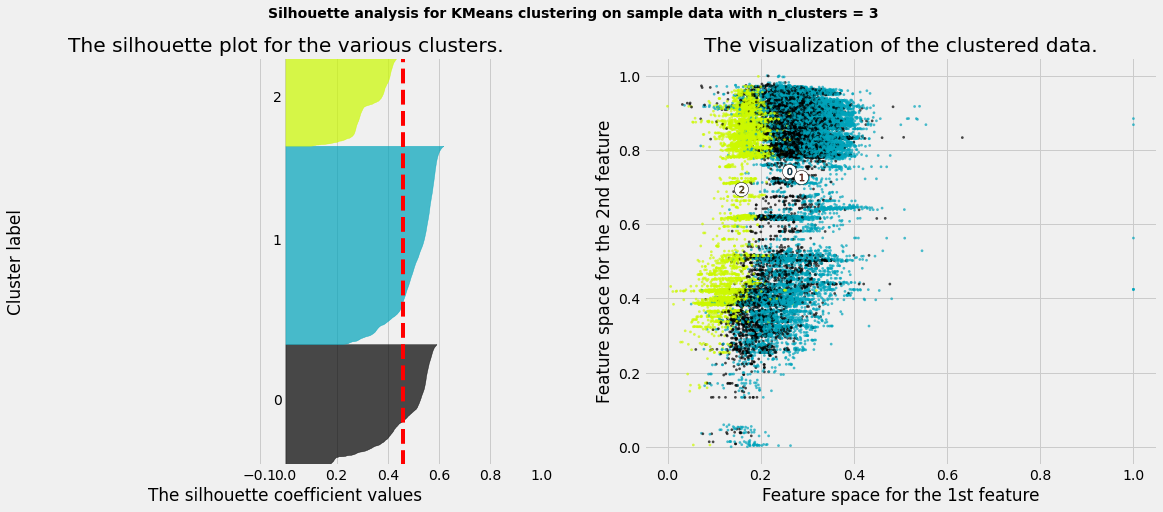

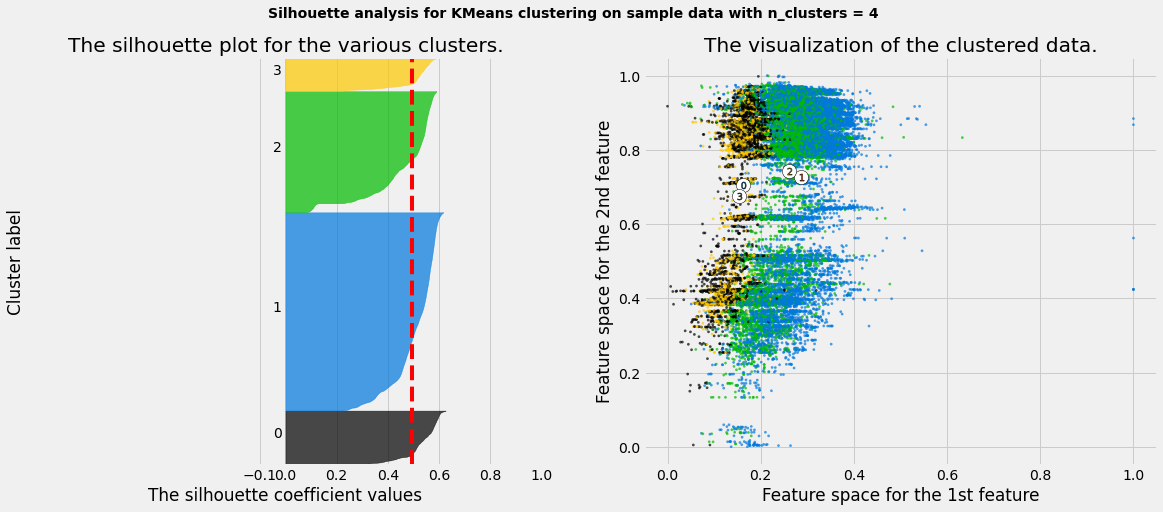

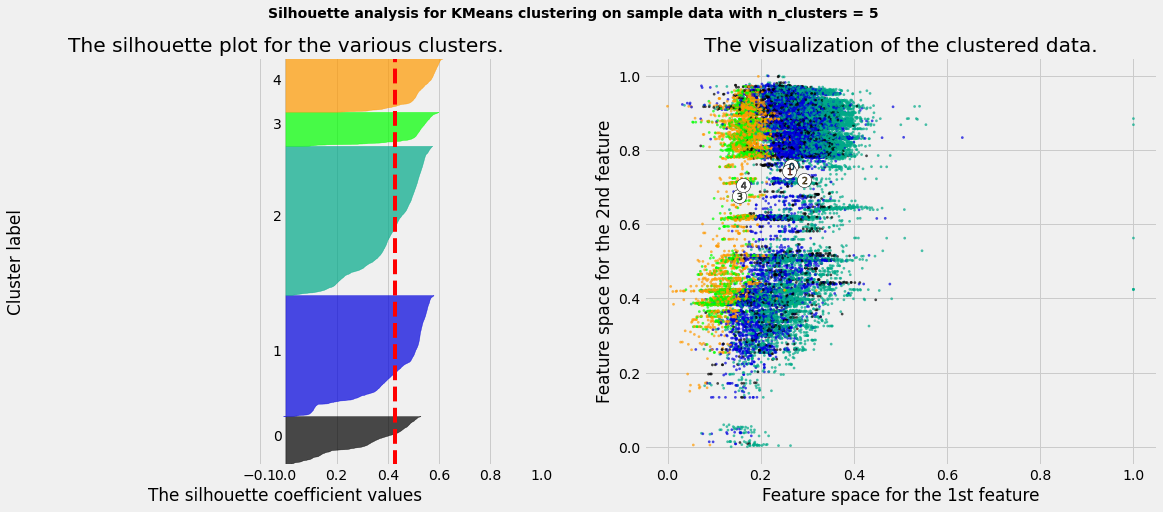

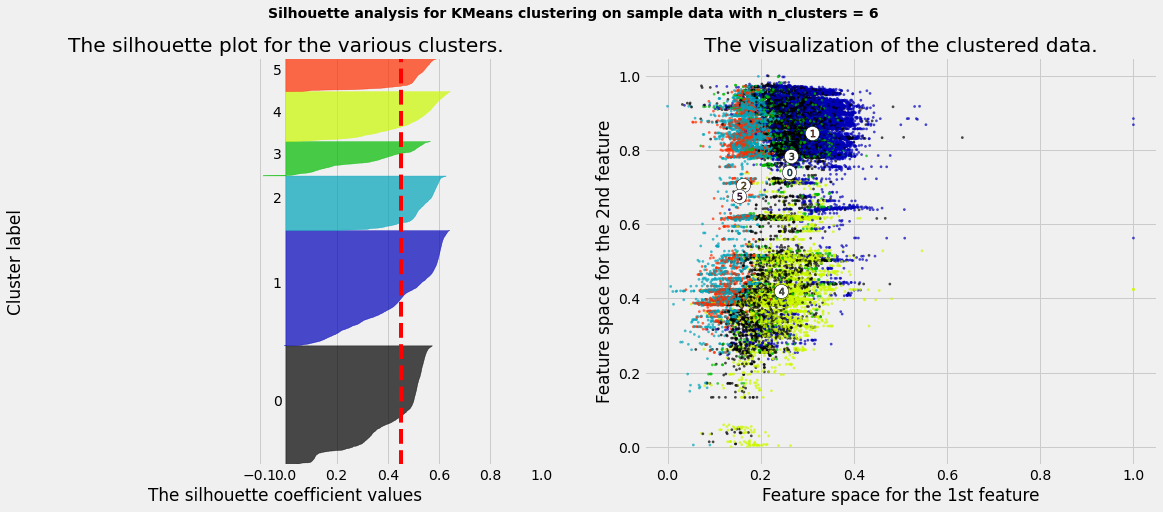

In [455]:

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_train) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X_train)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_train, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_train[:, 0], X_train[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#### Gaussian Mixture Model

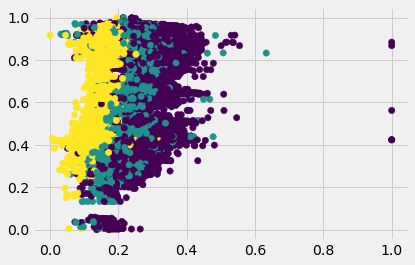

In [430]:
gmm = GaussianMixture(n_components=3, random_state=42).fit(X_train)
labels = gmm.predict(X_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels, s=40, cmap='viridis');

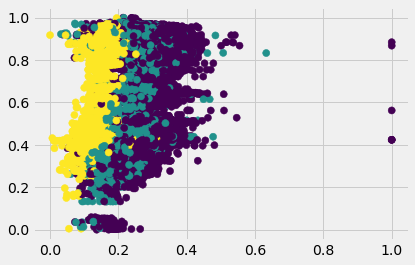

In [431]:
probs = gmm.predict_proba(X_train)
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels, cmap='viridis', s=size);